In [3]:
# Use ! to run a terminal command

# ! pip3 install wavio 
# ! pip3 install librosa
# ! pip3 install sounddevice

In [15]:
# import necessary modules
import sounddevice as sd
import soundfile as sf
from scipy.io.wavfile import write
%matplotlib inline
import numpy as np
import time
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import wave
import pygame
from scipy.fft import rfft, rfftfreq
from scipy.signal import freqz
from scipy.signal import butter
from scipy.signal import filtfilt
from scipy.signal import lfilter

In [5]:
SAMPLE_RATE = 44100
DURATION = 5

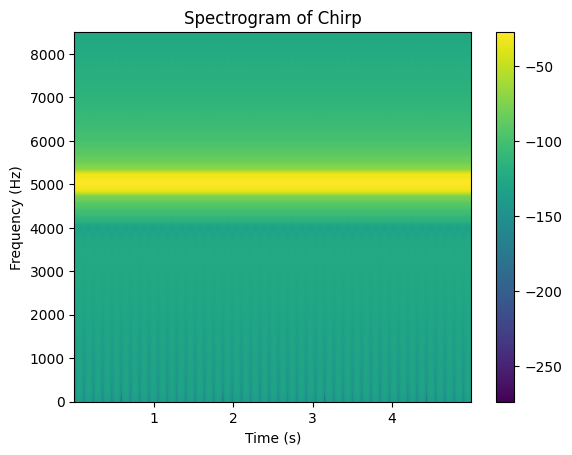

In [6]:
#sine tone

freq = 5000

def generate_sine_wave(freq, sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
    frequencies = t*freq
    sine = np.sin((2*np.pi)*frequencies)
    return t, sine

t, sine = generate_sine_wave(freq, SAMPLE_RATE, DURATION)

#save to file
sf.write('teamIbraheimBottrill-sinetone.wav', sine.T, SAMPLE_RATE)

# Plot the spectrogram
plt.specgram(sine, Fs=SAMPLE_RATE)
plt.ylim(0, 8500) # Zoom in to show just the first 8500 Hz
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Chirp')
plt.colorbar()
plt.show()

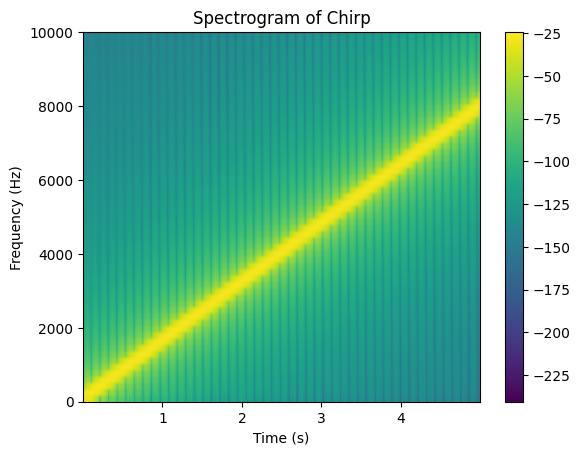

In [41]:
#chirp tone

def generate_chirp(sample_rate, duration):
    t = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
    frequencies = 800*t
    chirp = np.sin(2*np.pi*frequencies*t)
    return t, chirp

t, chirp = generate_chirp(SAMPLE_RATE, DURATION)

#save to file
sf.write('teamIbraheimBottrill-chirp.wav', chirp.T, SAMPLE_RATE)


# Plot  spectrogram
plt.specgram(chirp.T, Fs=SAMPLE_RATE)
plt.ylim(0, 10000) # Zoom in to show just the first 10000 hz
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Chirp')
plt.colorbar()
plt.show()

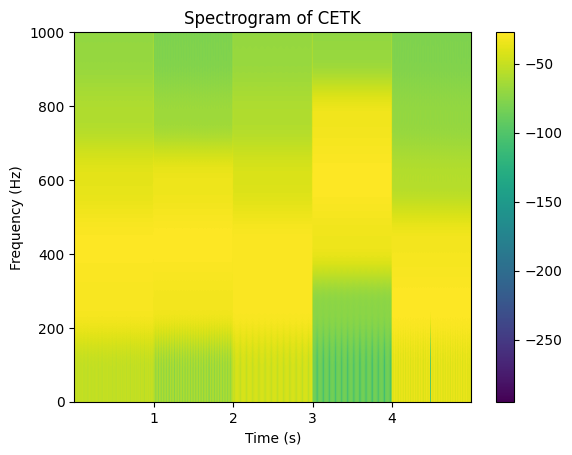

In [8]:
def generate_cetk(sample_rate, duration, frequencies):
    cetk = np.array([])  # Initialize array
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    for freq in frequencies:
        tone = np.sin(2 * np.pi * freq * t)
        cetk = np.concatenate((cetk, tone))
    return t, cetk

# Frequencies for the pitches from CETK found online https://www.ars-nova.com/Theory%20Q&A/Q35.html
frequenciesPitch = [293.7, 329.6, 261.6, 523.3, 196]

durationArray = [0.15, 0.25, 0.5, 0.15, 1]

# Generate the tone pattern for each duration separately
for i in durationArray:
    t, play = generate_cetk(SAMPLE_RATE, i, frequenciesPitch)

#save file
sf.write('teamIbraheimBottrill-cetk.wav', play.T, SAMPLE_RATE)

# Plot spectrogram
plt.specgram(play.T, Fs=SAMPLE_RATE)
plt.ylim(0, 1000)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of CETK')
plt.colorbar()
plt.show()

22050


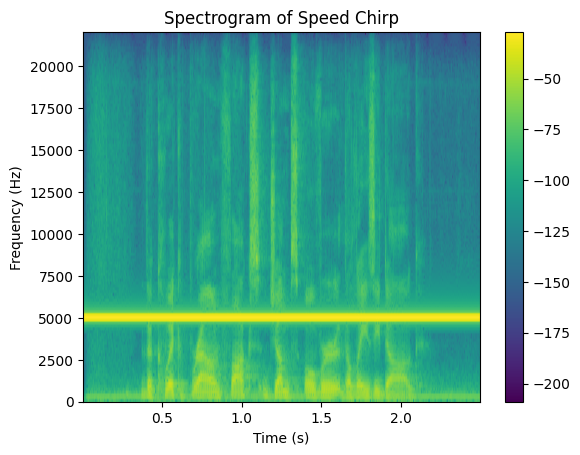

In [20]:
#combining sound files 

x, sr = librosa.load("sound1.wav")

# Resize sine wave 
sineResized = sine[:len(x)]


combined = x + sineResized

#save to file
sf.write('teamIbraheimBottrill-speedchirp.wav', combined.T, SAMPLE_RATE)


# Plot  spectrogram
plt.specgram(combined.T, Fs=SAMPLE_RATE)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Speed Chirp')
plt.colorbar()
plt.show()

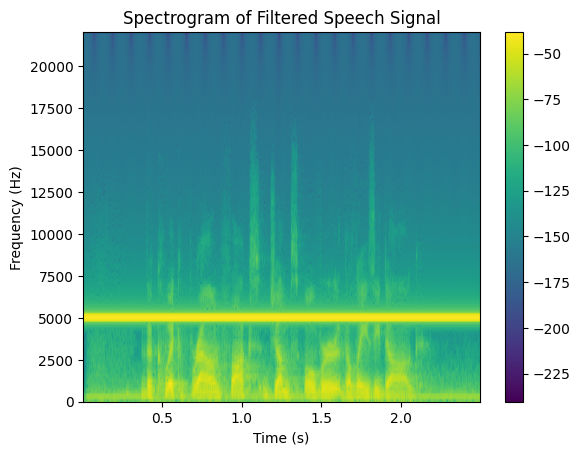

In [37]:
#speech and audio filtering 

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff /(0.5*fs)
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements.
order = 2      # sin wave can be approx represented as quadratic
cutoff = 4000


combinedFiltered = butter_lowpass_filter(combined, cutoff, SAMPLE_RATE, order)

#save to file
sf.write('teamIbraheimBottrill-filteredspeechsine.wav', combinedFiltered.T, SAMPLE_RATE)


#Plot  spectrogram
plt.specgram(combinedFiltered, Fs=SAMPLE_RATE)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Filtered Speech Signal')
plt.colorbar()
plt.show()